In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader

In [3]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device:", device)

Device: cpu


/home/kamil/.local/lib/python3.12/site-packages/torch/cuda/__init__.py:174: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
from dival import get_standard_dataset

dataset = get_standard_dataset("ellipses", impl="skimage")

test_dataset = dataset.create_torch_dataset()

In [5]:
batch_size = 16

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=4,
    pin_memory=True,
)

/home/kamil/.local/lib/python3.12/site-packages/odl/tomo/backends/skimage_radon.py:244: RuntimeWarning: The 'skimage' backend may be too slow for volumes of this size. Consider using 'astra_cpu', or 'astra_cuda' if your machine has an Nvidia GPU.
  warnings.warn(
/home/kamil/.local/lib/python3.12/site-packages/odl/tomo/backends/skimage_radon.py:244: RuntimeWarning: The 'skimage' backend may be too slow for volumes of this size. Consider using 'astra_cpu', or 'astra_cuda' if your machine has an Nvidia GPU.
  warnings.warn(
/home/kamil/.local/lib/python3.12/site-packages/odl/tomo/backends/skimage_radon.py:244: RuntimeWarning: The 'skimage' backend may be too slow for volumes of this size. Consider using 'astra_cpu', or 'astra_cuda' if your machine has an Nvidia GPU.
  warnings.warn(
/home/kamil/.local/lib/python3.12/site-packages/odl/tomo/backends/skimage_radon.py:244: RuntimeWarning: The 'skimage' backend may be too slow for volumes of this size. Consider using 'astra_cpu', or 'astra_cu

Sino shape: torch.Size([16, 30, 183])
Img shape: torch.Size([16, 128, 128])


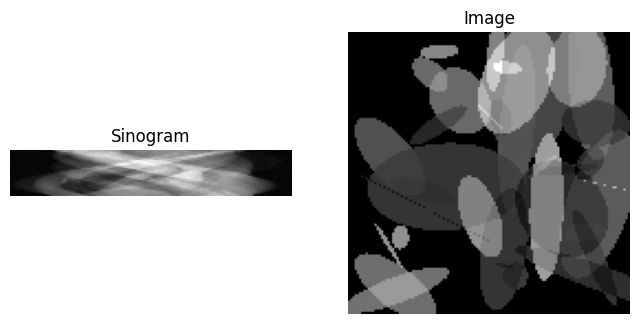

In [12]:
import matplotlib.pyplot as plt

for sino, img in test_loader:
    sino = sino.to(device)
    img = img.to(device)
    print("Sino shape:", sino.shape)
    print("Img shape:", img.shape)
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(sino[0].cpu(), cmap="gray")
    plt.title("Sinogram")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(img[0].cpu(), cmap="gray")
    plt.title("Image")
    plt.axis("off")
    plt.show()
    break